# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **12.10.2021**

Мягкий дедлайн: **25.10.21 23:59** (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: **28.10.21 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: ...

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2021-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

$$
    \nabla Q(w) = \dfrac{2}{\ell} X^{T}(Xw - y)
$$

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

![](adam.jpg)

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение 

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [1]:
%config Completer.use_jedi = False

In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [86]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [87]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [6]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/29933/enter/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**: https://contest.yandex.ru/contest/29933/run-report/55205533/


* **StochasticDescent**: https://contest.yandex.ru/contest/29933/run-report/55437910/


* **MomentumDescent**: https://contest.yandex.ru/contest/29933/run-report/55210090/


* **Adam**: https://contest.yandex.ru/contest/29933/run-report/55517267/


* **LinearRegression**: https://contest.yandex.ru/contest/29933/run-report/55440521/

Принимала участие в контесте под ником: Polina Cherepanova

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте, какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте, какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [8]:
data = pd.read_csv('autos.csv')

In [9]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


In [10]:
data.shape

(241190, 10)

Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

Проверю наличие пропусков в данных:

In [11]:
data.isna().sum().sum()

0

Ура, пропусков нет, можно идти дальше

In [12]:
categorical = ['brand', 'model', 'vehicleType', 'fuelType']
numeric = ['powerPS', 'kilometer', 'autoAgeMonths']
other = ['gearbox', 'notRepairedDamage']

In [13]:
data['bias'] = 1
other += ['bias']

x = data[categorical + numeric + other]
y = data['price']

Для начала разобью данные на тренировочную и тестовую выборки, чтобы производить подсчёт всех статистик по-честному только на тренировочной выборке.
(Разбиенеи тестовой на валидационную и непосредственно тестовую произведу уже после проведения всего EDA, чтобы избежать излишнего дублироания кода во время EDA)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

In [16]:
X_train.shape

(192952, 10)

In [17]:
X_test.shape

(48238, 10)

### Пункт 1

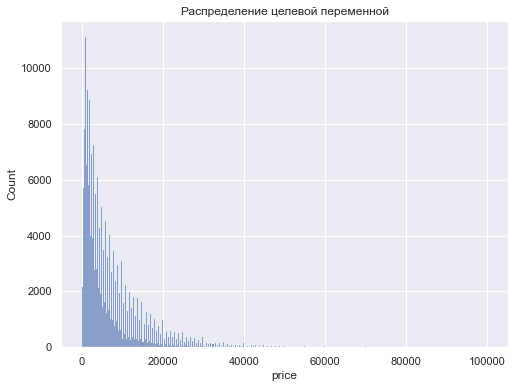

In [18]:
fig = plt.figure(figsize=(8,6))
sns.histplot(y_train)
plt.title('Распределение целевой переменной')
plt.show()

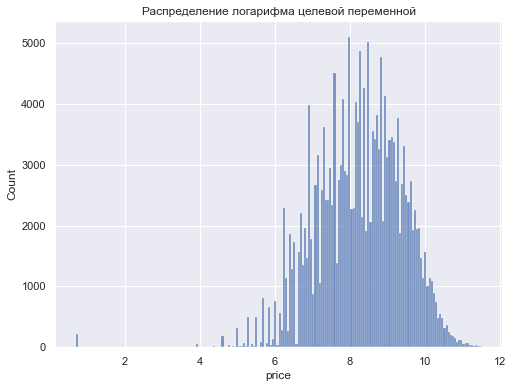

In [19]:
fig = plt.figure(figsize=(8, 6))
sns.histplot(np.log(y_train + 1))
plt.title('Распределение логарифма целевой переменной')
plt.show()

Логарифм целевой переменной имеет нормальное распределение, поэтому лучше заменить целевую переменную на её логарифм.

In [20]:
y_train_log = np.log(y_train + 1)
y_test_log = np.log(y_test + 1)

На первом графике распределение имеет "тяжёлый хвост" справа, это может мешать обучению линейной регрессии. Но этой проблемы нет у логарифма целевой переменной, так как я решила использовать для обучения именно логарифм целевой переменной, то не буду считать выбросами (и соответственно, не буду удалять из данных) никакие большие значения.

Но вот график распределения логарифма целевой переменной выявил левый "тяжелый хвост" распределения, то есть целевуйю переменную со слишком маленькими значениями.

In [21]:
np.exp(4) - 1

53.598150033144236

Таким образом, объекты, у которых логарифм целевой переменной имеет значение меньшее, чем 4 имеют фактическую (указанную владельцем) стоимость меньше 53 евро (считаю, что цена в евро, так как речь идёт о немецком Ebay), а это слишком уж маленькая цена, поэтому можно приянть такие объекты за выбросы.

In [22]:
mask_train = (y_train_log <= 4)
mask_test = (y_test_log <= 4)
print(mask_train.sum(), mask_test.sum())

298 63


In [23]:
(298 + 63) * 100 / 241190

0.1496745304531697

Тем более, что таких объектов в нашей выборке всего-то 298 + 63 = 361, что и это составляет всего чуть меньше 0.15 всей выборке (и тренировочной и тестовой), поэтому удалю все такие объекты из выборки.

In [24]:
X_train = X_train.loc[~mask_train]
X_test = X_test.loc[~mask_test]

y_train_log = y_train_log.loc[~mask_train]
y_test_log = y_test_log.loc[~mask_test]

### Пункт 2

In [25]:
from sklearn.preprocessing import OneHotEncoder

#### Признак brand

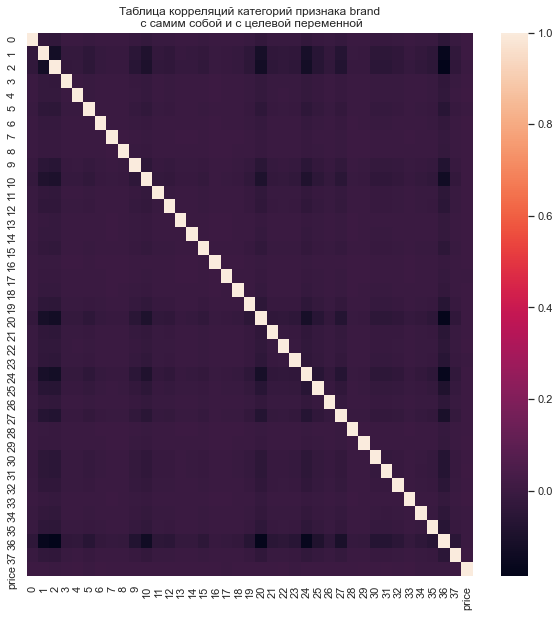

In [26]:
ohe = OneHotEncoder()
tmp = pd.DataFrame(ohe.fit_transform(pd.DataFrame(X_train['brand'])).toarray())
tmp['price'] = y_train_log

fig = plt.figure(figsize=(10,10))
sns.heatmap(tmp.corr())
plt.title('Таблица корреляций категорий признака brand\n с самим собой и с целевой переменной')
plt.show()

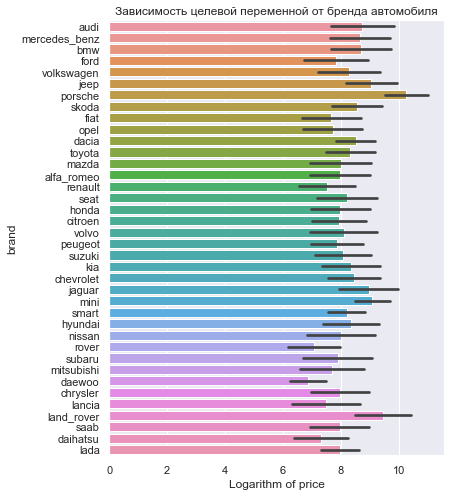

In [27]:
fig = plt.figure(figsize=(6, 8))
sns.barplot(x=y_train_log, y=X_train.brand, ci='sd')
plt.title('Зависимость целевой переменной от бренда автомобиля')
plt.xlabel('Logarithm of price')
plt.show()

In [28]:
len(X_train.brand.unique())

38

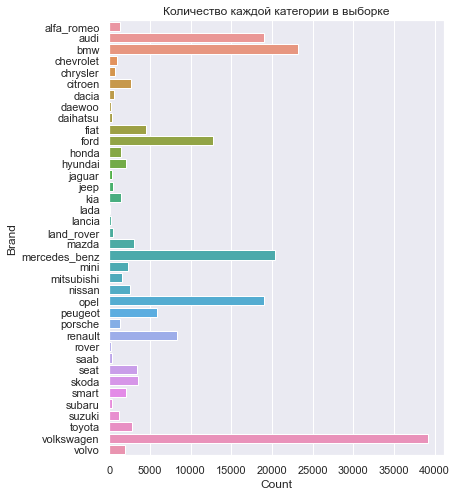

In [29]:
fig = plt.figure(figsize=(6, 8))
sns.barplot(x=X_train.groupby(by='brand').size(), y=np.sort(X_train.brand.unique()))
plt.title('Количество каждой категории в выборке')
plt.ylabel('Brand')
plt.xlabel('Count')
plt.show()

Brand - категориальный признак, всего 38 категорий.

После кодирования с помощью ohe будет получено 38 новых признаков, при этом у них у всех очень низкая корреляция.

При этом ещё и есть достаточно редкие категории, запомню это на будующее, если после ohe будет слишком много новых признаков, объединю какие-то в один. Так же можно подумать о том чтобы удалить эту колонку совсем.

#### Признак model

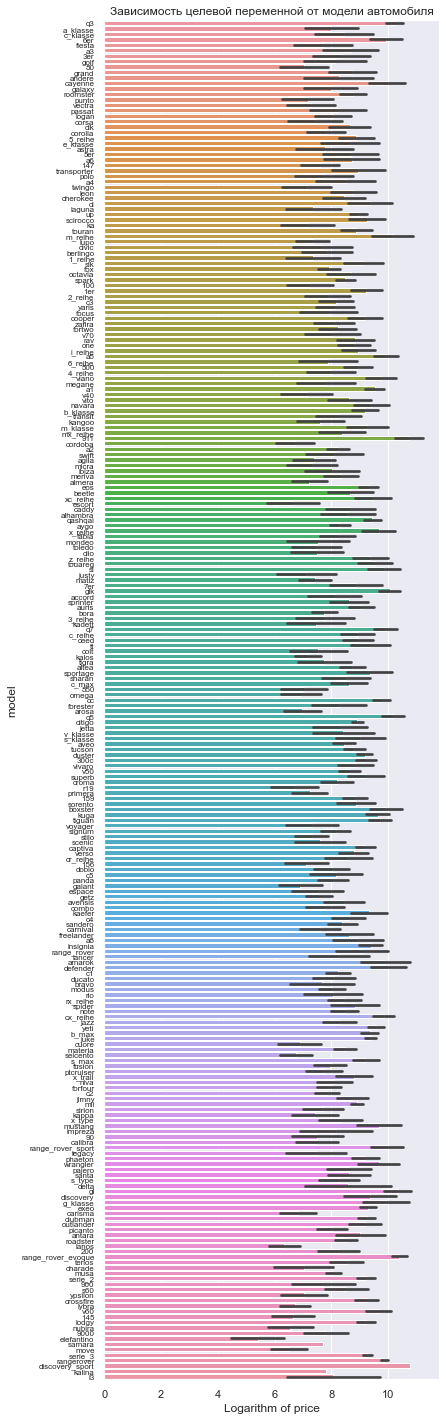

In [30]:
fig = plt.figure(figsize=(6, 25))
ax = fig.add_subplot()
sns.barplot(x=y_train_log, y=X_train.model, ci='sd')
plt.title('Зависимость целевой переменной от модели автомобиля')
ax.tick_params(axis='y', labelsize=8)
plt.xlabel('Logarithm of price')
plt.show()

In [31]:
len(X_train.model.unique())

249

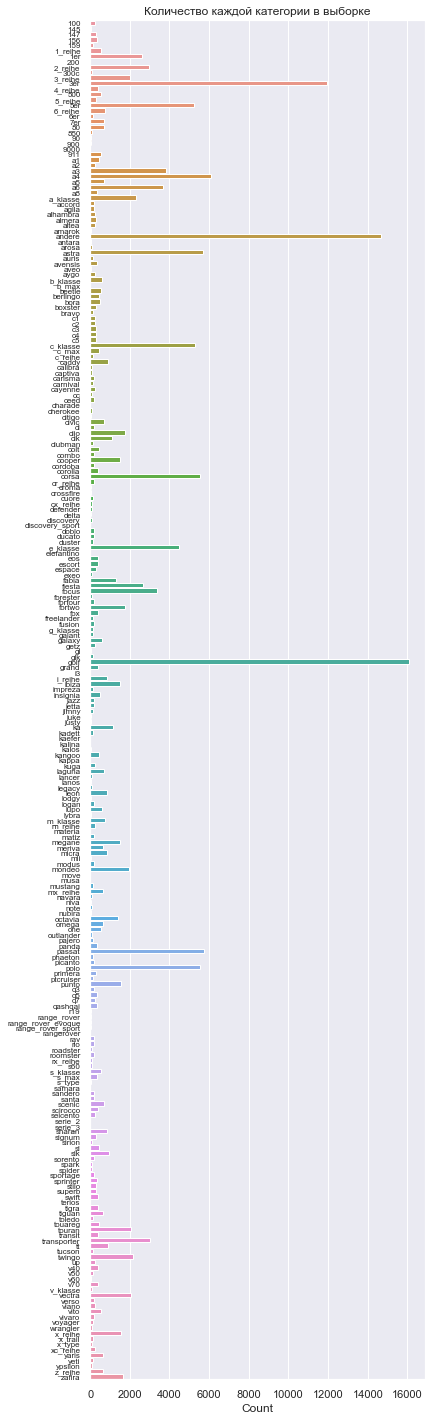

In [32]:
fig = plt.figure(figsize=(6, 25))
ax = fig.add_subplot()
sns.barplot(x=X_train.groupby(by='model').size(), y=np.sort(X_train.model.unique()))
plt.title('Количество каждой категории в выборке')
ax.tick_params(axis='y', labelsize=8)
plt.xlabel('Model')
plt.xlabel('Count')
plt.show()

Model - категориальный признак, 249 различных категорий.

Этот признак имеет очень много категорий, при этом многие из них совсем не многочисленные, при всё этом ещё и большинство категорий имеет большой разброс.

Удалю этот признак из данных, так как можно сказать с почти абсолютной уверенностью, что он не будет полезным для построения линейной модели.

In [33]:
X_train = X_train.drop('model', axis=1)
X_test = X_test.drop('model', axis=1)

#### Признак vehicleType

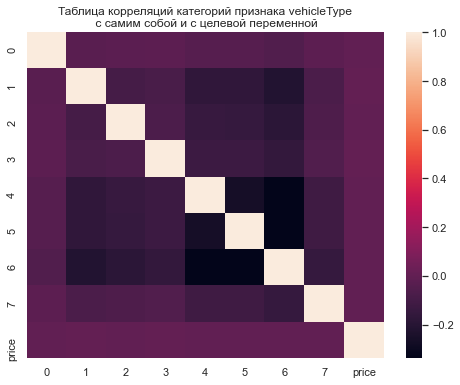

In [34]:
ohe = OneHotEncoder()
tmp = pd.DataFrame(ohe.fit_transform(pd.DataFrame(X_train['vehicleType'])).toarray())
tmp['price'] = y_train_log

fig = plt.figure(figsize=(8,6))
sns.heatmap(tmp.corr())
plt.title('Таблица корреляций категорий признака vehicleType\n с самим собой и с целевой переменной')
plt.show()

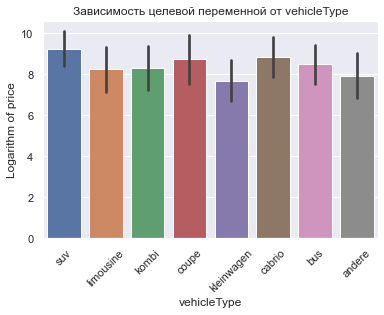

In [35]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot()
sns.barplot(x=X_train.vehicleType, y=y_train_log, ci='sd')
plt.title('Зависимость целевой переменной от vehicleType')
plt.ylabel('Logarithm of price')
ax.tick_params(axis='x', labelrotation=45)
plt.show()

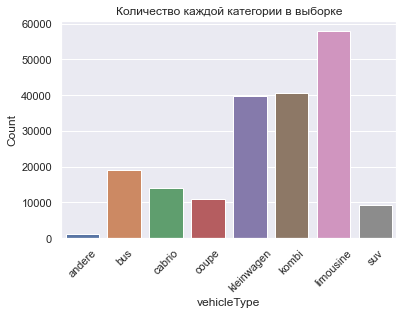

In [36]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot()
sns.barplot(x=np.sort(X_train.vehicleType.unique()), y=X_train.groupby(by='vehicleType').size())
plt.title('Количество каждой категории в выборке')
plt.xlabel('vehicleType')
ax.tick_params(axis='x', labelrotation=45)
plt.ylabel('Count')
plt.show()

Признак - vehicleType, 8 категорий.

После ohe получим не много категорий. Но при этом корреляция с целевой переменной совсем небольшая, это видно по самому первом груфику (heatmap). Кажется, что корреляция вообще нулевая.

Думаю, что не стоит ждать очень большой эффективности от этого признака при построении линейной модели. Удалю этот признак из данных.

In [37]:
X_train = X_train.drop('vehicleType', axis=1)
X_test = X_test.drop('vehicleType', axis=1)

#### Признак gearbox

In [38]:
X_train.gearbox.unique()

array(['manuell', 'automatik'], dtype=object)

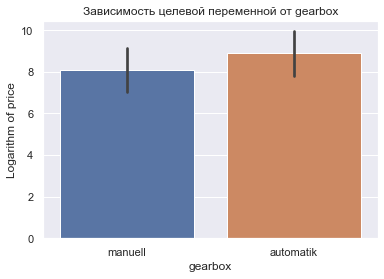

In [39]:
fig = plt.figure(figsize=(6, 4))
sns.barplot(x=X_train.gearbox, y=y_train_log, ci='sd')
plt.title('Зависимость целевой переменной от gearbox')
plt.ylabel('Logarithm of price')
plt.show()

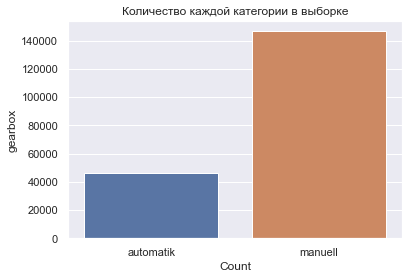

In [40]:
fig = plt.figure(figsize=(6, 4))
sns.barplot(x=np.sort(X_train.gearbox.unique()), y=X_train.groupby(by='gearbox').size())
plt.title('Количество каждой категории в выборке')
plt.ylabel('gearbox')
plt.xlabel('Count')
plt.show()

Признак - gearbox, бинарный признак.

Одна категория преобладает, разброс таргета почти отсутствует.

Признак хороший. Закодирую его вручную: automatik -> 1, manuell ->0.

In [41]:
X_train.loc[X_train.gearbox == 'automatik', 'gearbox'] = 1
X_train.loc[X_train.gearbox == 'manuell', 'gearbox'] = 0

X_test.loc[X_test.gearbox == 'automatik', 'gearbox'] = 1
X_test.loc[X_test.gearbox == 'manuell', 'gearbox'] = 0

#### Признак fuelType

In [42]:
X_train.fuelType.unique()

array(['benzin', 'diesel', 'lpg', 'hybrid', 'cng', 'andere', 'elektro'],
      dtype=object)

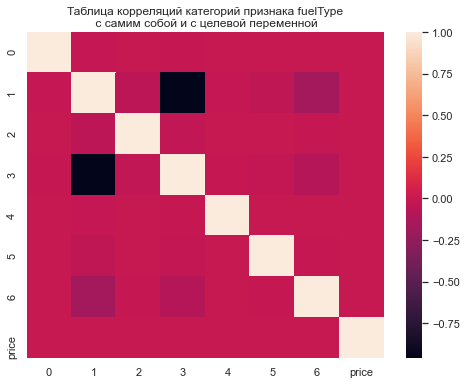

In [43]:
ohe = OneHotEncoder()
tmp = pd.DataFrame(ohe.fit_transform(pd.DataFrame(X_train['fuelType'])).toarray())
tmp['price'] = y_train_log

fig = plt.figure(figsize=(8,6))
sns.heatmap(tmp.corr())
plt.title('Таблица корреляций категорий признака fuelType\n с самим собой и с целевой переменной')
plt.show()

In [44]:
tmp.corr()

,0,1,2,3,4,5,6,price
0,1.000000,-0.015384,-0.000488,-0.008433,-0.000132,-0.000334,-0.001447,-0.000421
1,-0.015384,1.000000,-0.055596,-0.961155,-0.015086,-0.038058,-0.164902,-0.001671
2,-0.000488,-0.055596,1.000000,-0.030474,-0.000478,-0.001207,-0.005228,0.001584
3,-0.008433,-0.961155,-0.030474,1.000000,-0.008269,-0.020861,-0.090389,0.001704
4,-0.000132,-0.015086,-0.000478,-0.008269,1.000000,-0.000327,-0.001419,0.003302
5,-0.000334,-0.038058,-0.001207,-0.020861,-0.000327,1.000000,-0.003579,-0.000737
6,-0.001447,-0.164902,-0.005228,-0.090389,-0.001419,-0.003579,1.000000,-0.000677
price,-0.000421,-0.001671,0.001584,0.001704,0.003302,-0.000737,-0.000677,1.000000


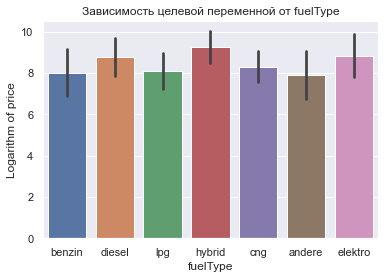

In [45]:
fig = plt.figure(figsize=(6, 4))
sns.barplot(x=X_train.fuelType, y=y_train_log, ci='sd')
plt.title('Зависимость целевой переменной от fuelType')
plt.ylabel('Logarithm of price')
plt.show()

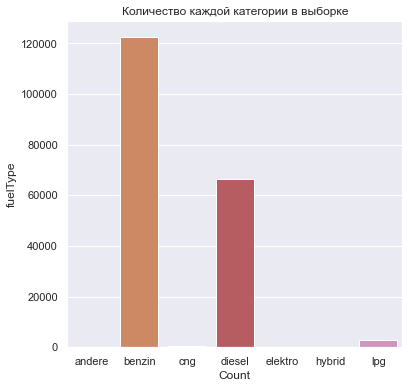

In [46]:
fig = plt.figure(figsize=(6, 6))
sns.barplot(x=np.sort(X_train.fuelType.unique()), y=X_train.groupby(by='fuelType').size())
plt.title('Количество каждой категории в выборке')
plt.ylabel('fuelType')
plt.xlabel('Count')
plt.show()

Признак - fuelType, всего 7 категорий.

Опять же имеется очень низкая корреляция с целевой переменной после применения ohe (судя по первом графику). Но так как всего 7 категорий, пока что оставлю этот признак в данных.

Вообще, преобладают всего две категории, это benzin и diesel, в принципе это ожидаемо.

#### Признак notRepairedDamage

In [47]:
X_train.notRepairedDamage.unique()

array(['nein', 'ja'], dtype=object)

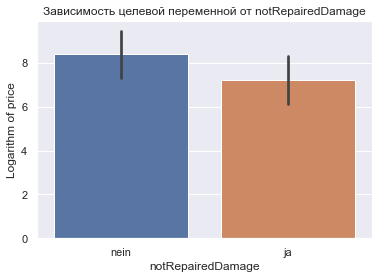

In [48]:
fig = plt.figure(figsize=(6, 4))
sns.barplot(x=X_train.notRepairedDamage, y=y_train_log, ci='sd')
plt.title('Зависимость целевой переменной от notRepairedDamage')
plt.ylabel('Logarithm of price')
plt.show()

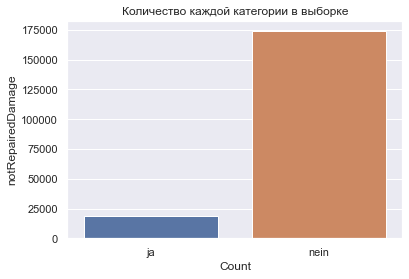

In [49]:
fig = plt.figure(figsize=(6, 4))
sns.barplot(x=np.sort(X_train.notRepairedDamage.unique()), y=X_train.groupby(by='notRepairedDamage').size())
plt.title('Количество каждой категории в выборке')
plt.ylabel('notRepairedDamage')
plt.xlabel('Count')
plt.show()

Признак - notRepairedDamage, бинарный признак.

Закодирую значение ja (да) единицей, а значение nein (нет) - нулём.

Иных преобразований этот признак не требует.

In [50]:
X_train.loc[X_train.notRepairedDamage == 'ja', 'notRepairedDamage'] = 1
X_train.loc[X_train.notRepairedDamage == 'nein', 'notRepairedDamage'] = 0

X_test.loc[X_test.notRepairedDamage == 'ja', 'notRepairedDamage'] = 1
X_test.loc[X_test.notRepairedDamage == 'nein', 'notRepairedDamage'] = 0

#### Признак powerPS

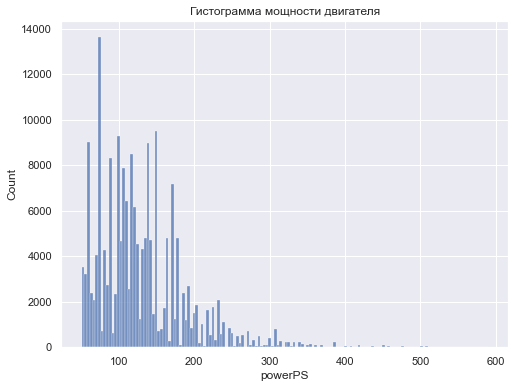

In [51]:
fig = plt.figure(figsize=(8, 6))
sns.histplot(X_train.powerPS, bins=150)
plt.title('Гистограмма мощности двигателя')
plt.xlabel('powerPS')
plt.show()

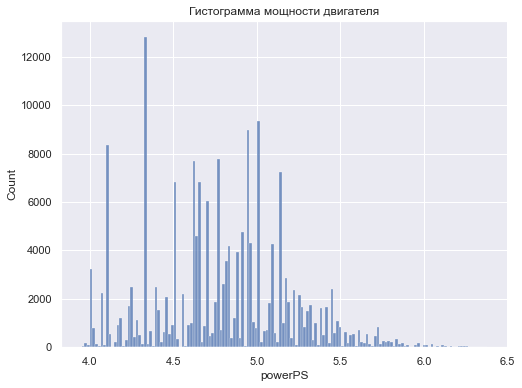

In [52]:
fig = plt.figure(figsize=(8, 6))
sns.histplot(np.log(X_train.powerPS + 1), bins=150)
plt.title('Гистограмма мощности двигателя')
plt.xlabel('powerPS')
plt.show()

Логарифмирование этого признака, вряд-ли будет эффективным решением.

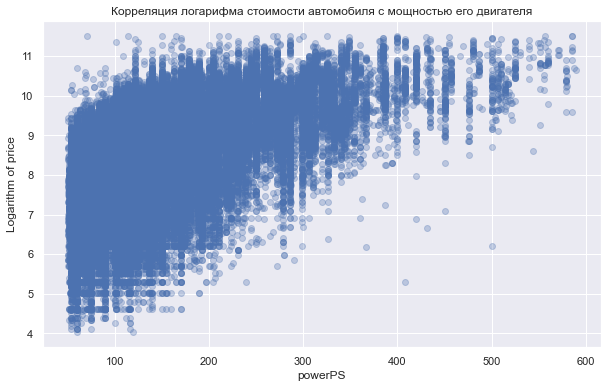

In [53]:
fig = plt.figure(figsize=(10, 6))
plt.scatter(x=X_train.powerPS, y=y_train_log, alpha=0.3)
plt.title('Корреляция логарифма стоимости автомобиля с мощностью его двигателя')
plt.xlabel('powerPS')
plt.ylabel('Logarithm of price')
plt.show()

Зависимость похожа на линейную, это ещё раз подтверждает то, что не нужно логарифмировать этот признак, он и так хороший. (Конечно же, к нему будет применён StandartScaler)

Распределение на самой первой картинке имеет "тяжёлый хвост" справа, посмотрю на такие же графики распределения для признака powerPC, но возьму только те объекты, значение powerPC которых меньше 99.5 квантили.

In [54]:
mask_powerPS_quantile = (X_train.powerPS < np.quantile(X_train.powerPS, 0.995))
mask_powerPS_quantile_test = (X_test.powerPS < np.quantile(X_test.powerPS, 0.995))
print((~mask_powerPS_quantile).sum(), (~mask_powerPS_quantile_test).sum())

1041 266


Имеем всего 1041 объект в обучающей выборке, который не попадёт в 99.5 квантиль.

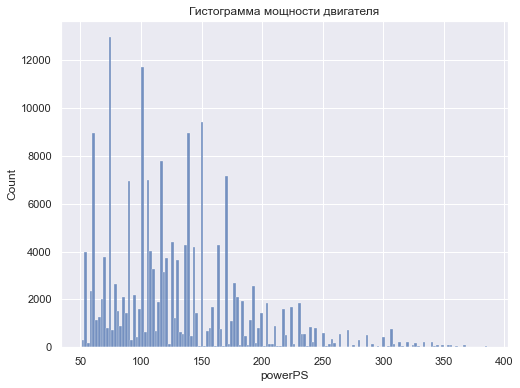

In [55]:
fig = plt.figure(figsize=(8, 6))
sns.histplot(X_train.loc[mask_powerPS_quantile, 'powerPS'], bins=150)
plt.title('Гистограмма мощности двигателя')
plt.xlabel('powerPS')
plt.show()

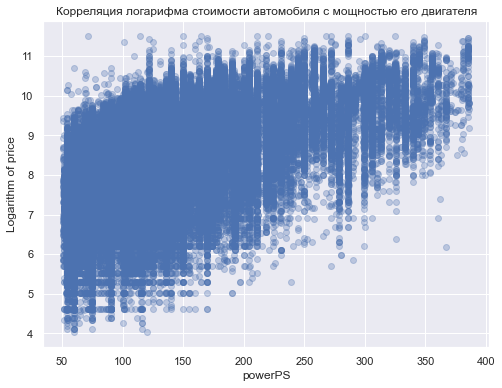

In [56]:
fig = plt.figure(figsize=(8, 6))
plt.scatter(x=X_train.loc[mask_powerPS_quantile, 'powerPS'], y=y_train_log.loc[mask_powerPS_quantile], alpha=0.3)
plt.title('Корреляция логарифма стоимости автомобиля с мощностью его двигателя')
plt.xlabel('powerPS')
plt.ylabel('Logarithm of price')
plt.show()

Особенно по второму графику видно, что если удалить этот "тяжёлый хвост", то зависимость становится более линейной и в целом, таких выбросов с очень мощным двигателем всего 1041 в обучающей выборке и всего 266 в тренировочной. Поэтому удалю эти объекты.

In [57]:
X_train = X_train.loc[mask_powerPS_quantile]
X_test = X_test.loc[mask_powerPS_quantile_test]

In [58]:
y_train_log = y_train_log.loc[mask_powerPS_quantile]
y_test_log = y_test_log.loc[mask_powerPS_quantile_test]

#### Признак kilometer

In [59]:
np.sort(X_train.kilometer.unique())

array([  5000,  10000,  20000,  30000,  40000,  50000,  60000,  70000,
        80000,  90000, 100000, 125000, 150000], dtype=int64)

In [60]:
len(X_train.kilometer.unique())

13

Вообще, конечно, этот признак можно было бы сделать и категориальным, так как по сути он принимает всего-то 13 значений, но с другой стороны, в таком случае его придётся кодировать с помощью ohe, а тут и без того очень много новых колонок получится. Поэтому склоняюсь больше к тому, чтобы оставить этот признак числовым и шкалировать его.

Построю графики, чтобы больше понять, как устроен этот признак.

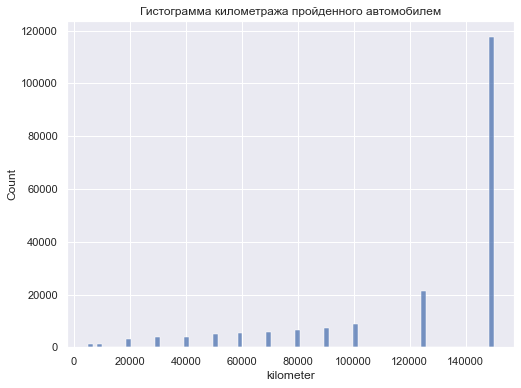

In [61]:
fig = plt.figure(figsize=(8, 6))
sns.histplot(X_train.kilometer)
plt.title('Гистограмма километража пройденного автомобилем')
plt.xlabel('kilometer')
plt.show()

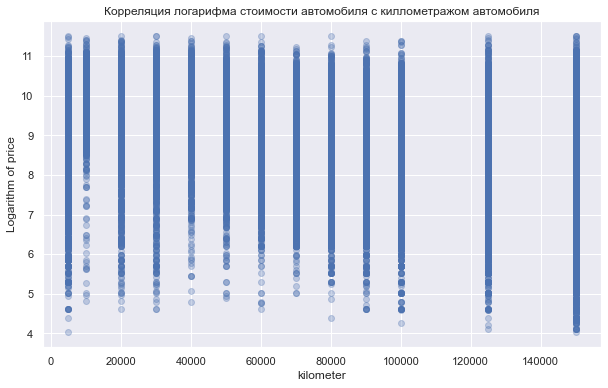

In [62]:
fig = plt.figure(figsize=(10, 6))
plt.scatter(x=X_train.kilometer, y=y_train_log, alpha=0.3)
plt.title('Корреляция логарифма стоимости автомобиля с киллометражом автомобиля')
plt.xlabel('kilometer')
plt.ylabel('Logarithm of price')
plt.show()

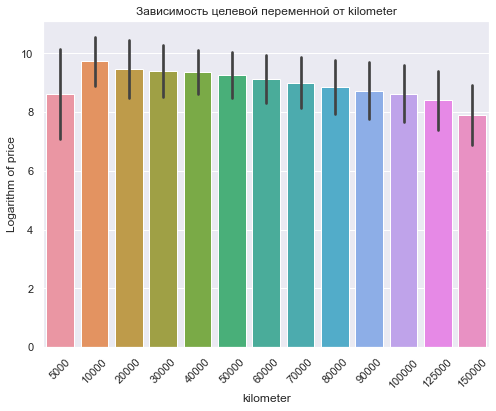

In [63]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()
sns.barplot(x=X_train.kilometer, y=y_train_log, ci='sd')
plt.title('Зависимость целевой переменной от kilometer')
plt.ylabel('Logarithm of price')
ax.tick_params(axis='x', labelrotation=45)
plt.show()

Последний график подтверждает, что можно оставить этот признак числовым, так как логарифм цены монотонно убывает с увеличением киллометрожа (за исключением значения 500).

Но в то же время, все "категории" имеют достаточно большой разброс, поэтому нельзя с уверенность сказать, что признак хороший.

#### Признак autoAgeMonths

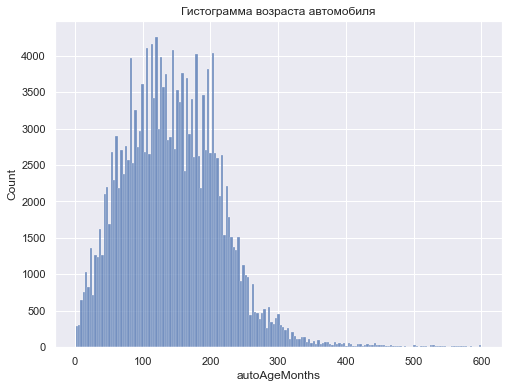

In [64]:
fig = plt.figure(figsize=(8, 6))
sns.histplot(X_train.autoAgeMonths)
plt.title('Гистограмма возраста автомобиля')
plt.xlabel('autoAgeMonths')
plt.show()

Распределение признака хорошее, похожее на нормальное, только есть "тяжёлый хвост" справа.

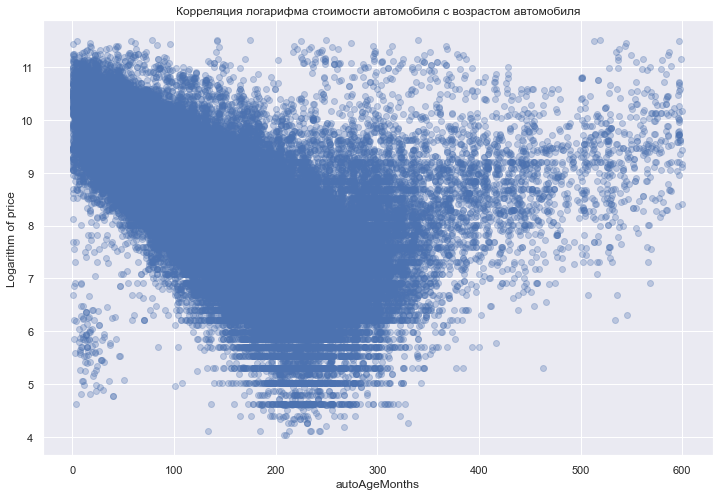

In [65]:
fig = plt.figure(figsize=(12, 8))
plt.scatter(x=X_train.autoAgeMonths, y=y_train_log, alpha=0.3)
plt.title('Корреляция логарифма стоимости автомобиля с возрастом автомобиля')
plt.xlabel('autoAgeMonths')
plt.ylabel('Logarithm of price')
plt.show()

Признак хорошо приближался бы линейной моделью, если бы не ончень старые автомобили, которые имеют большую стоимость

In [66]:
400 / 12

33.333333333333336

Машины, возраст которых больше 33 лет, при этом стоимость высокая. Возможно это какие-то раритетные или коллекционные машины, мибо на самом деле очень дорогое авто, которые не подешевело за такое время.

Создам отдельный бинарный признак is_old_and_expensive и обозначу единицами именно такие объекты, о которых сейчас шла речь.

In [67]:
mask_train = (X_train.autoAgeMonths >  400)
mask_test = (X_test.autoAgeMonths >  400)
print(mask_train.sum(), mask_test.sum())

1196 286


In [68]:
X_train.shape

(191613, 8)

In [69]:
1196 * 100 / 191613

0.6241747689353019

По сути, таких объектом очень мало, и на предыдущих шагах EDA я удаляла такие аномалии немногочисленные (всего-то около 0.624 процента от всей выборки) из данных, но в этот раз мне почему-то не хочется этого делать.

In [70]:
X_train['is_old_and_expensive'] = np.zeros(X_train.shape[0])
X_test['is_old_and_expensive'] = np.zeros(X_test.shape[0])

X_train.loc[mask_train, 'is_old_and_expensive'] = 1
X_test.loc[mask_test, 'is_old_and_expensive'] = 1

In [71]:
X_train.head()

,brand,fuelType,powerPS,kilometer,autoAgeMonths,gearbox,notRepairedDamage,bias,is_old_and_expensive
29296,audi,benzin,170,10000,28,0,0,1,0.0
168892,mercedes_benz,benzin,102,150000,195,1,0,1,0.0
204523,mercedes_benz,diesel,116,150000,169,0,0,1,0.0
12421,bmw,benzin,218,150000,418,0,0,1,1.0
223047,ford,benzin,80,70000,94,0,0,1,0.0


### Пункт 3 (доразбиение данных)

In [72]:
X_val, X_test_real, y_val, y_test_real = train_test_split(X_test,
                                                          y_test_log,
                                                          test_size=0.5,
                                                          random_state=123)

### Финальное преобразование

In [73]:
categorical = ['brand', 'fuelType', 'is_old_and_expensive']
numeric = ['powerPS', 'kilometer', 'autoAgeMonths']
other = ['gearbox', 'notRepairedDamage', 'bias']

In [74]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

X_train_tr = column_transformer.fit_transform(X_train)
X_val_tr = column_transformer.transform(X_val)
X_test_real_tr = column_transformer.transform(X_test_real)

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [97]:
import warnings
warnings.filterwarnings('ignore')

In [75]:
from sklearn.metrics import r2_score

In [126]:
alphas = np.logspace(-3, 0, 15)

descents = ['full', 'stochastic', 'momentum', 'adam']
dimension_ = X_train_tr.shape[1]

for descent_name_ in descents:
    print(f'Descent type = {descent_name_}:')
    for i, alpha_ in enumerate(alphas):
        descent_config = {
            'descent_name': descent_name_,
            'kwargs': {
                'dimension': dimension_,
                'lambda_' : alpha_
            }
        }
        
        regression = LinearRegression(
            descent_config=descent_config
        )

        regression.fit(X_train_tr.toarray(), np.array(y_train_log))
        
        train_loss = regression.calc_loss(X_train_tr.toarray(), np.array(y_train_log))
        val_loss = regression.calc_loss(X_val_tr.toarray(), np.array(y_val))
        r2 = r2_score(y_val, regression.predict(X_val_tr.toarray()))
        print(f'    lambda= {alpha_:6f}: train loss= {train_loss:6f},\
        validation loss= {val_loss:6f}, R^2 score= {r2:6f}')
    print('=======================================================================================')

Descent type = full:
    lambda= 0.001000: train loss= 40.831584,        validation loss= 40.933321, R^2 score= -32.196097
    lambda= 0.001638: train loss= 49.090064,        validation loss= 49.317459, R^2 score= -38.995464
    lambda= 0.002683: train loss= 29.615352,        validation loss= 29.691071, R^2 score= -23.078860
    lambda= 0.004394: train loss= 23.775856,        validation loss= 23.906232, R^2 score= -18.387472
    lambda= 0.007197: train loss= 12.959091,        validation loss= 13.035228, R^2 score= -9.571307
    lambda= 0.011788: train loss= 6.618306,        validation loss= 6.669637, R^2 score= -4.408941
    lambda= 0.019307: train loss= 2.726804,        validation loss= 2.740315, R^2 score= -1.222340
    lambda= 0.031623: train loss= 1.402274,        validation loss= 1.406564, R^2 score= -0.140695
    lambda= 0.051795: train loss= 1.077298,        validation loss= 1.072487, R^2 score= 0.130234
    lambda= 0.084834: train loss= 0.704541,        validation loss= 0.69534

Я не перебираю лямбды, порядок которых больше 0, так как для всех методов при лямбдах порядка хотя бы 1, я получала переполнение значений ошибок, поэтому, можно скзаать, что лямбда большие 1 вообще не рассматриваются.

In [127]:
best_lambdas = {
    'full' : 1.0,
    'stochastic' : 0.610540,
    'momentum' : 0.610540,
    'adam' : 0.610540
}

Теперь обучу каждый из методов с лучшей лямбдой.

In [156]:
loss_history = {}
iteration_max = {}

descents = ['full', 'stochastic', 'momentum', 'adam']
dimension_ = X_train_tr.shape[1]

for descent_name_ in descents:
    print(f'Descent type = {descent_name_}:')
    descent_config = {
        'descent_name': descent_name_,
        'kwargs': {
            'dimension': dimension_,
            'lambda_' : best_lambdas[descent_name_]
        }
    }

    regression = LinearRegression(
        descent_config=descent_config
    )

    regression.fit(X_train_tr.toarray(), np.array(y_train_log))
    loss_history[descent_name_] = regression.loss_history
    iteration_max[descent_name_] = len(regression.loss_history)

    train_loss = regression.calc_loss(X_train_tr.toarray(), np.array(y_train_log))
    val_loss = regression.calc_loss(X_val_tr.toarray(), np.array(y_val))
    r2 = r2_score(y_val, regression.predict(X_val_tr.toarray()))
    print(f'    lambda= {best_lambdas[descent_name_]:6f}: train loss= {train_loss:6f},\
    validation loss= {val_loss:6f}, R^2 score= {r2:6f}')
    print('=======================================================================================')

Descent type = full:
    lambda= 1.000000: train loss= 0.420297,    validation loss= 0.412154, R^2 score= 0.665751
Descent type = stochastic:
    lambda= 0.610540: train loss= 0.434561,    validation loss= 0.425324, R^2 score= 0.655070
Descent type = momentum:
    lambda= 0.610540: train loss= 0.290951,    validation loss= 0.282606, R^2 score= 0.770812
Descent type = adam:
    lambda= 0.610540: train loss= 0.274795,    validation loss= 0.266563, R^2 score= 0.783823


### Задание 5.2. Сравнение методов (1 балла) 

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

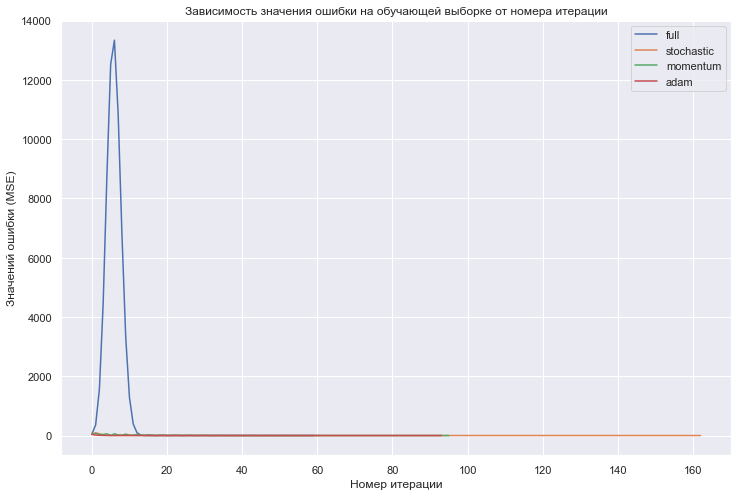

In [158]:
fig = plt.figure(figsize=(12, 8))

for descent_name_ in descents:
    plt.plot(np.arange(iteration_max[descent_name_]),
             loss_history[descent_name_],
             label=descent_name_)
    
plt.title('Зависимость значения ошибки на обучающей выборке от номера итерации')
plt.xlabel('Номер итерации')
plt.ylabel('Значений ошибки (MSE)')
plt.legend()
plt.show()

Из-за сильно разных масштабов ошибок на первых итерациях у обучного градиентного спуска график получился не очень показательным, поэтому построю ещё один, где отрисую RMSE.

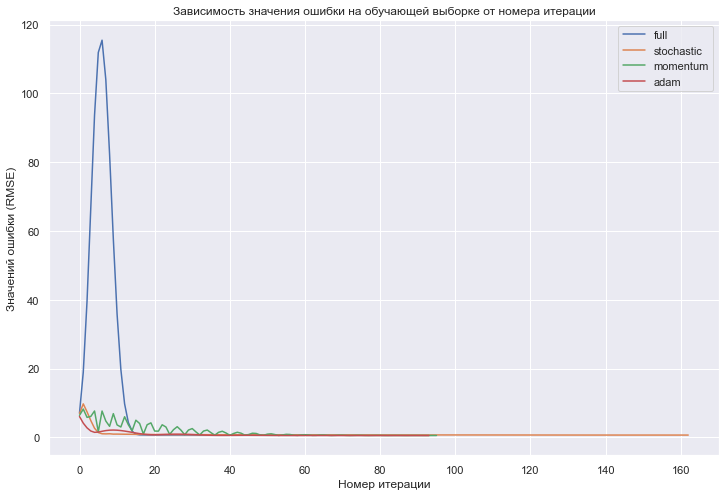

In [159]:
fig = plt.figure(figsize=(12, 8))

for descent_name_ in descents:
    plt.plot(np.arange(iteration_max[descent_name_]),
             np.sqrt(np.array(loss_history[descent_name_])),
             label=descent_name_)
    
plt.title('Зависимость значения ошибки на обучающей выборке от номера итерации')
plt.xlabel('Номер итерации')
plt.ylabel('Значений ошибки (RMSE)')
plt.legend()
plt.show()

Все 4 рассмотренных метода сошлись к нулевой ошибке и показали хороший результат.

Самую быструю сходимость показал стохастический градиентный спуск. При этом стохастический градиентный спуск не останавливается раньше, чем  пройдёт заданной колличество итерраций, это связанно с тем, что ошибка на небольшом случайном баче редко может оказаться около нулевой, поэтому этот метод всегда отрабатывает до конца и много итераций тратятся впустую блуждая около минимума. Несмотря на это стохастический градиентный спуск, очевидно затрачивает гораздо меньше времени на каждую из итераций (из-за упрощённого подсчёта градиентов), поэтому вряд-ли он уступает во времени работы остальным методам.

Методы Adam и Momentum, показали примерно одинаковый результат по числу требуемых итераций, хотя Adam и имеет более плавную сходимость. Вообще, одно из основных преимуществ Momentum - это то, что этот метод может проскакивать локальные минимумы и мы с большей вероятность в итоге попадём  глобальный минимум (такое же свойство присутствует и у Adam), но так как в этой задаче мы оптимизируем простую MSE, тут эти методы не могут показать свою сильную сторону в этом.

In [160]:
iteration_max['full']

60

Обычный градиентный спуск в самом начале имеет сильный скачёк ошибки, но потом так же как и остальные методы сходится к минимуму, при чём этому методу понадобилось меньше всего итерраций, чтобы дойти до минимума. Это связано с тем, что градиенты у этого метода точнее навравлены в сторону минимумы (по сравнению с стохатическим методом), а так как функция, которую мы оптимизируем достаточно простая (MSE) и не имеет локальных минимумов, а все данные мы отшкалировали и Momentum не имеет здесь преимущества в отсутствии осциляций по сравнению с обычным градиентным спуском, поэтому и получается, что обычному GD понадобилось меньше итерраций, чтобы сойтись в минимум.

Но, скорее всего времени на это ушло гораздо больше, чем для стахостического GD, так как подсчёт градиентов на каждом шаге более трудоёмкий.

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [133]:
from time import time

In [135]:
batch_sizes = np.arange(5, 500, 10)
dimension_ = X_train_tr.shape[1]
times_res = []
iterations_res = []

for batch_size in batch_sizes:
    times = []
    iterations = []   
    descent_config = {
        'descent_name': 'stochastic',
        'kwargs': {
            'dimension': dimension_,
            'lambda_' : best_lambdas['stochastic'], # использую лучшую лямбду для этого эксперимента
            'batch_size' : batch_size
        }
    }
    for k in range(10):
        regression = LinearRegression(
            descent_config=descent_config
        )
        start = time()
        regression.fit(X_train_tr.toarray(), np.array(y_train_log))
        times.append(time() - start)
        iterations.append(len(regression.loss_history))

    times_res.append(np.array(times).mean())
    iterations_res.append(np.array(iterations).mean())

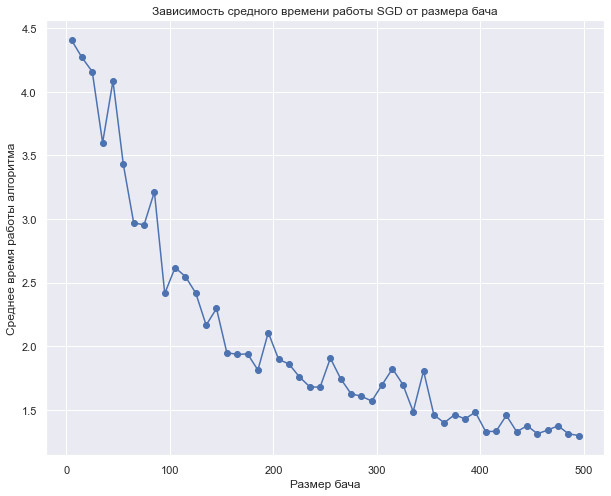

In [138]:
plt.figure(figsize=(10,8))
plt.plot(batch_sizes, times_res, marker='o')
plt.title('Зависимость средного времени работы SGD от размера бача')
plt.xlabel('Размер бача')
plt.ylabel('Среднее время работы алгоритма')
plt.show()

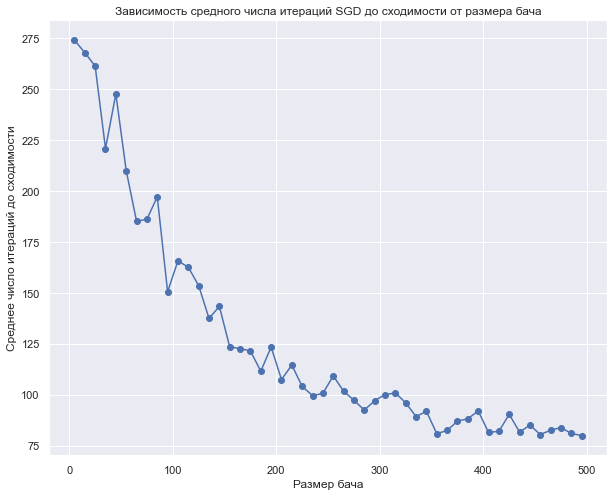

In [140]:
plt.figure(figsize=(10,8))
plt.plot(batch_sizes, iterations_res, marker='o')
plt.title('Зависимость средного числа итераций SGD до сходимости от размера бача')
plt.xlabel('Размер бача')
plt.ylabel('Среднее число итераций до сходимости')
plt.show()

По графикам хорошо видно, что и число итераций до сходимости SGD и время работы алгоритма SGD обратно пропорциональны размеру бача. Таким образом, можно сделать вывод, что для более бустрого обучения модели не стоит брать слишком маленькие бачи, так как это только замедляет работу алгоритма. Но в то же время, если брать слишком большие бачи, о вероятнее всего, что время работы алгоритма увеличилось бы уже из-за более сложного вычисления градиента на каждом шаге SGD.

Поэтому, можно сказать, что подбор размера бача важен при обучении модели с помощью SGD, так как может существенно повлиять на скороть обучения при обучении более сложных моделей, например для нейронных сетей, это может быть очень важным фактором. 

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**: https://contest.yandex.ru/contest/29933/run-report/55546133/

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [147]:
alphas = np.logspace(-3, 0, 10)
mus = np.logspace(-4, 2, 10)

descents = ['full', 'stochastic', 'momentum', 'adam']
dimension_ = X_train_tr.shape[1]

for descent_name_ in descents:
    print(f'Descent type = {descent_name_}:')
    for alpha_ in alphas:
        for mu_ in mus:
            descent_config = {
                'descent_name': descent_name_,
                'regularized' : True,
                'kwargs': {
                    'dimension': dimension_,
                    'lambda_' : alpha_,
                    'mu' : mu_
                }
            }

            regression = LinearRegression(
                descent_config=descent_config
            )

            regression.fit(X_train_tr.toarray(), np.array(y_train_log))

            train_loss = regression.calc_loss(X_train_tr.toarray(), np.array(y_train_log))
            val_loss = regression.calc_loss(X_val_tr.toarray(), np.array(y_val))
            r2 = r2_score(y_val, regression.predict(X_val_tr.toarray()))
            print(f'  (lambda,mu)=({alpha_:6f},{mu_:6f}): train loss= {train_loss:6f},\
 | val loss= {val_loss:6f}, R^2= {r2:6f}')
        print('=======================================================================================')

Descent type = full:
  (lambda,mu)=(0.001000,0.000100): train loss= 42.897105, | val loss= 43.093275, R^2= -33.947777
  (lambda,mu)=(0.001000,0.000464): train loss= 39.314645, | val loss= 39.477616, R^2= -31.015550
  (lambda,mu)=(0.001000,0.002154): train loss= 54.205263, | val loss= 54.442092, R^2= -43.151438
  (lambda,mu)=(0.001000,0.010000): train loss= 32.493784, | val loss= 32.626803, R^2= -25.459679
  (lambda,mu)=(0.001000,0.046416): train loss= 45.648418, | val loss= 45.884762, R^2= -36.211616
  (lambda,mu)=(0.001000,0.215443): train loss= 36.357846, | val loss= 36.463556, R^2= -28.571208
  (lambda,mu)=(0.001000,1.000000): train loss= 43.235510, | val loss= 43.344416, R^2= -34.151447
  (lambda,mu)=(0.001000,4.641589): train loss= 42.136173, | val loss= 42.254677, R^2= -33.267690
  (lambda,mu)=(0.001000,21.544347): train loss= 34.887278, | val loss= 34.981219, R^2= -27.369063
  (lambda,mu)=(0.001000,100.000000): train loss= 58.853437, | val loss= 58.944112, R^2= -46.802485
  (lam

  (lambda,mu)=(0.215443,100.000000): train loss= 62.707680, | val loss= 62.778714, R^2= -49.912270
  (lambda,mu)=(0.464159,0.000100): train loss= 0.520351, | val loss= 0.510528, R^2= 0.585972
  (lambda,mu)=(0.464159,0.000464): train loss= 0.532696, | val loss= 0.521509, R^2= 0.577066
  (lambda,mu)=(0.464159,0.002154): train loss= 0.475911, | val loss= 0.463416, R^2= 0.624179
  (lambda,mu)=(0.464159,0.010000): train loss= 0.504164, | val loss= 0.493527, R^2= 0.599760
  (lambda,mu)=(0.464159,0.046416): train loss= 0.523687, | val loss= 0.509576, R^2= 0.586744
  (lambda,mu)=(0.464159,0.215443): train loss= 0.686727, | val loss= 0.675832, R^2= 0.451914
  (lambda,mu)=(0.464159,1.000000): train loss= 2.464471, | val loss= 2.459743, R^2= -0.994802
  (lambda,mu)=(0.464159,4.641589): train loss= 15.764215, | val loss= 15.786704, R^2= -11.802699
  (lambda,mu)=(0.464159,21.544347): train loss= 44.943912, | val loss= 44.999845, R^2= -35.493966
  (lambda,mu)=(0.464159,100.000000): train loss=    in

  (lambda,mu)=(0.046416,0.215443): train loss= 1.509282, | val loss= 1.506170, R^2= -0.221473
  (lambda,mu)=(0.046416,1.000000): train loss= 2.656185, | val loss= 2.653490, R^2= -1.151927
  (lambda,mu)=(0.046416,4.641589): train loss= 15.714208, | val loss= 15.736069, R^2= -11.761635
  (lambda,mu)=(0.046416,21.544347): train loss= 44.922070, | val loss= 44.974238, R^2= -35.473199
  (lambda,mu)=(0.046416,100.000000): train loss= 62.808474, | val loss= 62.878698, R^2= -49.993355
  (lambda,mu)=(0.100000,0.000100): train loss= 0.788105, | val loss= 0.778862, R^2= 0.368359
  (lambda,mu)=(0.100000,0.000464): train loss= 0.699999, | val loss= 0.690701, R^2= 0.439855
  (lambda,mu)=(0.100000,0.002154): train loss= 0.722264, | val loss= 0.710903, R^2= 0.423472
  (lambda,mu)=(0.100000,0.010000): train loss= 0.808850, | val loss= 0.795554, R^2= 0.354822
  (lambda,mu)=(0.100000,0.046416): train loss= 0.723425, | val loss= 0.706740, R^2= 0.426848
  (lambda,mu)=(0.100000,0.215443): train loss= 0.8257

  (lambda,mu)=(0.010000,0.002154): train loss= 0.855830, | val loss= 0.841575, R^2= 0.317500
  (lambda,mu)=(0.010000,0.010000): train loss= 0.821830, | val loss= 0.810613, R^2= 0.342609
  (lambda,mu)=(0.010000,0.046416): train loss= 0.952690, | val loss= 0.942487, R^2= 0.235662
  (lambda,mu)=(0.010000,0.215443): train loss= 0.896588, | val loss= 0.887314, R^2= 0.280406
  (lambda,mu)=(0.010000,1.000000): train loss= 2.516519, | val loss= 2.513537, R^2= -1.038427
  (lambda,mu)=(0.010000,4.641589): train loss= 14.931070, | val loss= 14.955831, R^2= -11.128877
  (lambda,mu)=(0.010000,21.544347): train loss= 45.068267, | val loss= 45.127372, R^2= -35.597388
  (lambda,mu)=(0.010000,100.000000): train loss= 63.067362, | val loss= 63.137125, R^2= -50.202935
  (lambda,mu)=(0.021544,0.000100): train loss= 0.566792, | val loss= 0.555451, R^2= 0.549540
  (lambda,mu)=(0.021544,0.000464): train loss= 0.707685, | val loss= 0.695342, R^2= 0.436092
  (lambda,mu)=(0.021544,0.002154): train loss= 0.75174

  (lambda,mu)=(0.001000,0.215443): train loss= 35.630290, | val loss= 35.776184, R^2= -28.013763
  (lambda,mu)=(0.001000,1.000000): train loss= 38.004229, | val loss= 38.216402, R^2= -29.992731
  (lambda,mu)=(0.001000,4.641589): train loss= 49.188650, | val loss= 49.354008, R^2= -39.025104
  (lambda,mu)=(0.001000,21.544347): train loss= 33.700161, | val loss= 33.853646, R^2= -26.454624
  (lambda,mu)=(0.001000,100.000000): train loss= 42.649726, | val loss= 42.846931, R^2= -33.747997
  (lambda,mu)=(0.002154,0.000100): train loss= 46.004323, | val loss= 46.158131, R^2= -36.433313
  (lambda,mu)=(0.002154,0.000464): train loss= 41.917218, | val loss= 42.088865, R^2= -33.133220
  (lambda,mu)=(0.002154,0.002154): train loss= 38.860594, | val loss= 39.036892, R^2= -30.658132
  (lambda,mu)=(0.002154,0.010000): train loss= 47.586434, | val loss= 47.783345, R^2= -37.751328
  (lambda,mu)=(0.002154,0.046416): train loss= 43.293713, | val loss= 43.431531, R^2= -34.222095
  (lambda,mu)=(0.002154,0.2

  (lambda,mu)=(0.464159,0.010000): train loss= 0.347600, | val loss= 0.338728, R^2= 0.725298
  (lambda,mu)=(0.464159,0.046416): train loss= 0.488013, | val loss= 0.478493, R^2= 0.611952
  (lambda,mu)=(0.464159,0.215443): train loss= 0.727015, | val loss= 0.716471, R^2= 0.418956
  (lambda,mu)=(0.464159,1.000000): train loss= 2.463721, | val loss= 2.458180, R^2= -0.993535
  (lambda,mu)=(0.464159,4.641589): train loss= 15.645553, | val loss= 15.668268, R^2= -11.706649
  (lambda,mu)=(0.464159,21.544347): train loss= 45.044426, | val loss= 45.101745, R^2= -35.576606
  (lambda,mu)=(0.464159,100.000000): train loss= 62.824524, | val loss= 62.896433, R^2= -50.007738
  (lambda,mu)=(1.000000,0.000100): train loss= 0.274892, | val loss= 0.266634, R^2= 0.783765
  (lambda,mu)=(1.000000,0.000464): train loss= 0.279601, | val loss= 0.271586, R^2= 0.779750
  (lambda,mu)=(1.000000,0.002154): train loss= 0.287402, | val loss= 0.278970, R^2= 0.773761
  (lambda,mu)=(1.000000,0.010000): train loss= 0.33998

При некоторых значениях параметром иногда возникало переполнение, по сути, лучше было бы взять сетку по mu следующим образом: `mus = np.logspace(-3, 0, 10)`, но так как запуск занял ооочень много времени, нет возможности сделать это ещё раз для более красивого вывода (и возможно чуть более точного подбора пар лучших гиперпараметров), поэтому выберу лучшие параметры из того набора, который уже имеется:

In [149]:
best_pairs = {
    'full' : (1.000000, 0.002154),
    'stochastic' : (0.464159, 0.000100),
    'momentum' : (1.000000, 0.000464),
    'adam' : (1.000000, 0.000464)
}

Теперь обучу каждый из методов с лучшими параметрами:

In [178]:
loss_history_reg = {}
iterations_reg = {}

descents = ['full', 'stochastic', 'momentum', 'adam']
dimension_ = X_train_tr.shape[1]

for descent_name_ in descents:
    print(f'Descent type = {descent_name_}:')
    descent_config = {
        'descent_name': descent_name_,
        'regularized' : True,
        'kwargs': {
            'dimension': dimension_,
            'lambda_' : best_pairs[descent_name_][0],
            'mu' : best_pairs[descent_name_][1]
        }
    }

    regression = LinearRegression(
        descent_config=descent_config
    )

    regression.fit(X_train_tr.toarray(), np.array(y_train_log))
    loss_history_reg[descent_name_] = regression.loss_history
    iterations_reg[descent_name_] = len(regression.loss_history)

    train_loss = regression.calc_loss(X_train_tr.toarray(), np.array(y_train_log))
    val_loss = regression.calc_loss(X_val_tr.toarray(), np.array(y_val))
    r2 = r2_score(y_val, regression.predict(X_val_tr.toarray()))
    print(f'  (lambda,mu)=({best_pairs[descent_name_][0]:6f},{best_pairs[descent_name_][1]:6f}): train loss= {train_loss:6f},\
 | val loss= {val_loss:6f}, R^2= {r2:6f}')
    print('==========================================================================================')

Descent type = full:
  (lambda,mu)=(1.000000,0.002154): train loss= 0.539341, | val loss= 0.525219, R^2= 0.574058
Descent type = stochastic:
  (lambda,mu)=(0.464159,0.000100): train loss= 0.578469, | val loss= 0.567487, R^2= 0.539779
Descent type = momentum:
  (lambda,mu)=(1.000000,0.000464): train loss= 0.285638, | val loss= 0.276773, R^2= 0.775543
Descent type = adam:
  (lambda,mu)=(1.000000,0.000464): train loss= 0.278886, | val loss= 0.270515, R^2= 0.780617


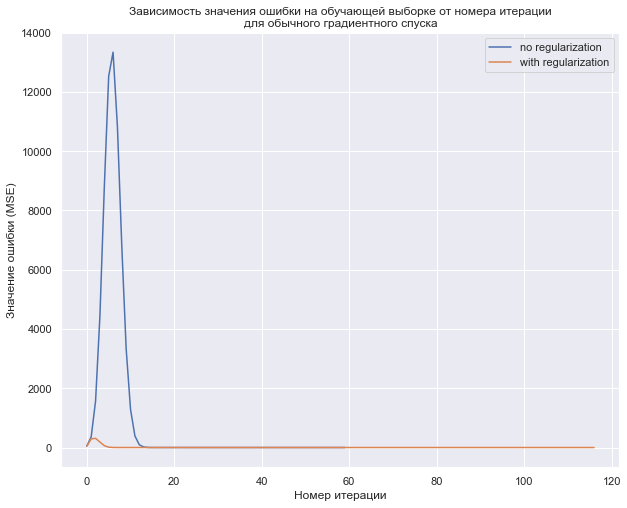

In [179]:
fig = plt.figure(figsize=(10, 8))

plt.plot(np.arange(iteration_max['full']),
         loss_history['full'],
         label='no regularization')
plt.plot(np.arange(iterations_reg['full']),
         loss_history_reg['full'],
         label='with regularization')
    
plt.title('Зависимость значения ошибки на обучающей выборке от номера итерации\n\
для обычного градиентного спуска')
plt.xlabel('Номер итерации')
plt.ylabel('Значение ошибки (MSE)')
plt.legend()
plt.show()

Градиентный спуск с регуляризацией сошёлся гораздо быстрее к нулю, хотя и колебался около него потом ещё в течении очень большого числа итераций, тем не менее, сходимость гораздо более стабильная у GD с регуляризацией. При подкрутке ещё каких-то параметров (например tolerance) можно было бы обучить модель за очень маленькое чилос итераций.

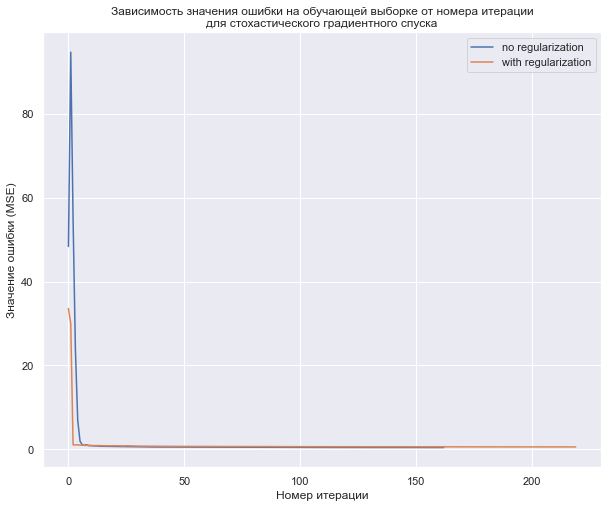

In [180]:
fig = plt.figure(figsize=(10, 8))

plt.plot(np.arange(iteration_max['stochastic']),
         loss_history['stochastic'],
         label='no regularization')
plt.plot(np.arange(iterations_reg['stochastic']),
         loss_history_reg['stochastic'],
         label='with regularization')
    
plt.title('Зависимость значения ошибки на обучающей выборке от номера итерации\n\
для стохастического градиентного спуска')
plt.xlabel('Номер итерации')
plt.ylabel('Значение ошибки (MSE)')
plt.legend()
plt.show()

Для стохастического градиентного спуска наличие у функции потерь регуляризации так же как и для обычного GD играет большую роль, с регуляризацией ошибка очень быстро падает в ноль и обучение модели существенно происходит существенно быстрее.

Думаю, что и для GD и для SGD с регуляризацией можно было бы подобрать параметры длины шака и избжать блуждания около минимума такое большое количество итераций. Тогда бы роль регуляризации у функционала была бы гораздо более существенна. Обучение модели, скорее всего, происходило бы буквально задесяток шагов.

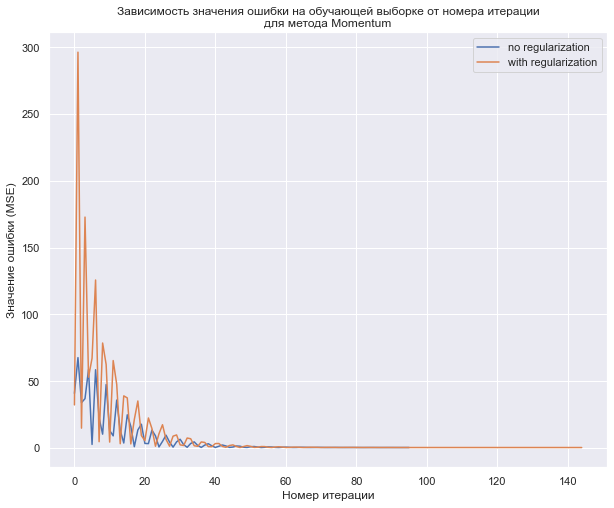

In [181]:
fig = plt.figure(figsize=(10, 8))

plt.plot(np.arange(iteration_max['momentum']),
         loss_history['momentum'],
         label='no regularization')
plt.plot(np.arange(iterations_reg['momentum']),
         loss_history_reg['momentum'],
         label='with regularization')
    
plt.title('Зависимость значения ошибки на обучающей выборке от номера итерации\n\
для метода Momentum')
plt.xlabel('Номер итерации')
plt.ylabel('Значение ошибки (MSE)')
plt.legend()
plt.show()

In [183]:
iterations_reg['momentum'] - iteration_max['momentum']

49

Momentum без регуляризациеи имеет гораздо более стабильное повеодение, если судить по графику выше. Momentum с регуляризацией сходился дольше и флуктуации ошибок на тренировочной выборке в разы больше с регуляризацией. Не могу предположить, почему регуляризацияотрицательно повлияла на метод Momentum.

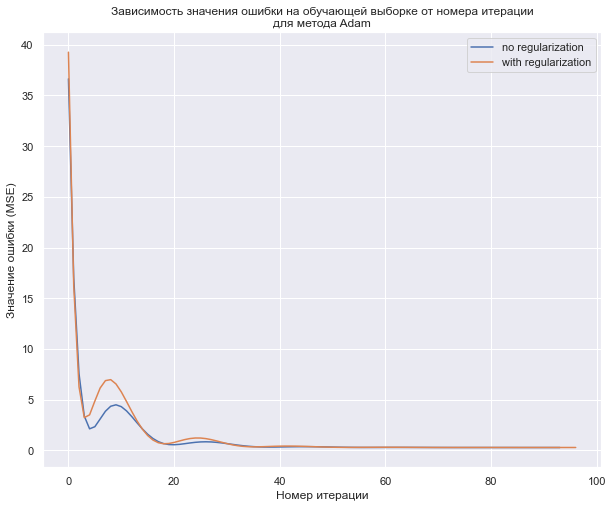

In [184]:
fig = plt.figure(figsize=(10, 8))

plt.plot(np.arange(iteration_max['adam']),
         loss_history['adam'],
         label='no regularization')
plt.plot(np.arange(iterations_reg['adam']),
         loss_history_reg['adam'],
         label='with regularization')
    
plt.title('Зависимость значения ошибки на обучающей выборке от номера итерации\n\
для метода Adam')
plt.xlabel('Номер итерации')
plt.ylabel('Значение ошибки (MSE)')
plt.legend()
plt.show()

Adam с регуляризацией так же как и Momentum медёт себя хоже, чем Adam, без регуляризации. Думаю, что причины у этого один и те же, так как Adam по сути содержит в себе метод Momentum.

Таким образом, наличие регуляризации позволяет очень сильно улучшить обычный GD и стохастический GD, в то время как Adam и Momentum с регуляризацией работают хуже, чем буз неё.

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регресии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:

$$
    d_w L
    =
    d_w log(cosh(Xw-y))
    =
    \frac{1}{cosh(Xw-y)} d_w cosh(Xw-y)
    =
    \frac{1}{cosh(Xw-y)} sinh(Xw-y) d_w (Xw-y)
    =
    \frac{sinh(Xw-y)}{cosh(Xw-y)} d_w (Xw-y)
    =
    th(Xw-y) d_w (Xw-y)
    =
    th(Xw-y) d_w (Xw)
    =
    th(Xw-y) X d_w w
$$

Получаю, что:

$$
    \nabla_w L
    =
    th(Xw-y)X
$$

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

In [ ]:
# YOUR CODE:

### Социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, пора гулять в парках и общаться со своими одногруппниками. Прикрепите фотографию вашей прогулки с минимум пятью одногруппниками по какому-нибудь парку или бульвару. Кратко опишите ваши впечатления.

`### ваша прогулка тут ###`

### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

In [ ]:
# YOUR CODE:

### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

In [ ]:
# YOUR CODE: